In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from sklearn.linear_model import LinearRegression
import sympy as sym
from sympy import init_printing
init_printing(use_latex=True)
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import lgbayes

In [36]:
from lgbayes.models import LinearGaussianBN

In [37]:
def sample():
    u = np.random.normal(0,s_u,size=n)
    z = w_zu*u + np.random.normal(0,s_z,size=n)
    x = w_xz*z+np.random.normal(0,s_x,size=n)
    y = w_yx*x + w_yz*z + w_yu*u+ np.random.normal(0,s_y,size=n)
    return {"U":u,"Z":z,"X":x,"Y":y}

In [38]:
s_u = 1
s_z = 0.3
s_x = 1
s_y = 0.5

w_zu = 2
w_xz = 0.5
w_yx = 0.5
w_yz = -1.0
w_yu = 3.0


beta_x = 0.5
beta_z = -1
sigma = 0.5
n = 1000

In [39]:
data_dict = sample()
df1 = pd.DataFrame(data_dict,columns=["U","Z","X","Y"])
df1.cov()

,U,Z,X,Y
U,1.045510,2.078233,1.109808,1.626206
Z,2.078233,4.216427,2.250842,3.173679
X,1.109808,2.250842,2.197477,2.203349
Y,1.626206,3.173679,2.203349,3.066799


In [40]:
model = LinearGaussianBN()
model.add_var("X",[])
model.add_var("Y",["X"])
print(model)
model.cov
a = model.observe(["X"],["x"])
a.cov
a.mu[0].simplify()

X ~ N(w_X0 ; e_X)
Y ~ N(w_Y0 + w_YX*X ; e_Y)



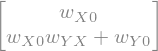

In [41]:
model.mu

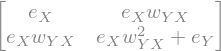

In [42]:
model.cov

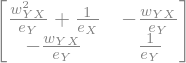

In [43]:
model.information_matrix

In [29]:
model = LinearGaussianBN()
model.add_var("U",None,[0],s_u**2)
model.add_var("Z",["U"],[0,w_zu],s_z**2)
model.add_var("X",["Z"],[0,w_xz],s_x**2)
model.add_var("Y",["U","Z","X"],[0,w_yu,w_yz,w_yx],s_y**2)

print (model)
data_dict = dict(zip(model.variables,model.sample(n).T))
df = pd.DataFrame(data_dict,columns=model.variables)
df.cov()

U ~ N(0 ; 1)
Z ~ N(2*U ; 0.09)
X ~ N(0.5*Z ; 1)
Y ~ N(3*U + -1*Z + 0.5*X ; 0.25)



,U,Z,X,Y
U,1.071703,2.133539,1.085406,1.614399
Z,2.133539,4.340082,2.204571,3.141919
X,1.085406,2.204571,2.125659,2.121871
Y,1.614399,3.141919,2.121871,2.989927
